In [1]:
import pandas as pd
import numpy as np
!pip install cufflinks
!pip install plotly
!pip install chart_studio
import cufflinks as cf
from plotly.offline import plot, iplot
import plotly.graph_objs as go
import plotly.io as pio 
import cufflinks as cf
cf.go_offline()
import plotly
import plotly.graph_objs as go
import plotly.offline as py
import chart_studio.plotly as pyo


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import chart_studio
import chart_studio.plotly as pyo 

In [3]:
chart_studio.tools.set_credentials_file(username = 'AIROTIV', api_key='w9A6F1Humpbgnzw7bXO5')

In [4]:
pio.renderers.default = 'colab'

In [5]:
data = pd.read_csv("df_brasil2021.csv")
data

,Unnamed: 0,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-01,26,210147125.0,18622304,65163,520095,2029,16858632.0,1180443.0
1,1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-02,26,210147125.0,18687469,65165,521952,1857,16931272.0,1170937.0
2,2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-03,26,210147125.0,18742025,54556,523587,1635,16989351.0,1176166.0
3,3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-04,27,210147125.0,18769808,27783,524417,830,17033808.0,1184630.0
4,4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-05,27,210147125.0,18792511,22703,525112,695,17082876.0,1162515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,179,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-12-27,52,210147125.0,22246276,6840,618534,86,21557380.0,70362.0
180,180,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-12-28,52,210147125.0,22254706,8430,618705,171,21567845.0,68156.0
181,181,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-12-29,52,210147125.0,22263834,9128,618817,112,21575485.0,69532.0
182,182,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-12-30,52,210147125.0,22277239,13405,618984,167,21582700.0,75555.0


In [6]:
colunas_lixo = ['populacaoTCU2019','regiao','estado', 'municipio','coduf','codmun','codRegiaoSaude','nomeRegiaoSaude','casosAcumulado','casosNovos','Recuperadosnovos','emAcompanhamentoNovos']
data = data.drop(colunas_lixo, axis=1)

In [7]:
data

,Unnamed: 0,data,semanaEpi,obitosAcumulado,obitosNovos
0,0,2021-07-01,26,520095,2029
1,1,2021-07-02,26,521952,1857
2,2,2021-07-03,26,523587,1635
3,3,2021-07-04,27,524417,830
4,4,2021-07-05,27,525112,695
...,...,...,...,...,...
179,179,2021-12-27,52,618534,86
180,180,2021-12-28,52,618705,171
181,181,2021-12-29,52,618817,112
182,182,2021-12-30,52,618984,167


<Axes: >

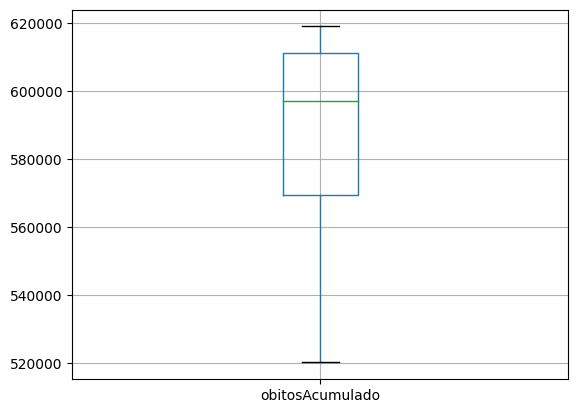

In [8]:
data.boxplot(column = 'obitosAcumulado')

In [9]:
data.iplot(kind='scatter', x='semanaEpi', y='obitosAcumulado')

In [10]:
data.data = pd.to_datetime(data.data)

In [11]:
data['data_mes'] = data.data.dt.to_period('M').astype(str)

In [12]:
mortes_mes = data.groupby(by='data_mes').obitosNovos.sum()

In [13]:
data = [go.Bar(x=mortes_mes.index,
               y=mortes_mes.values,
               marker= {'color': ' hotpink'})]

#criando layout
configuracoes_layout = go.Layout(title='Óbitos por mês: ',
                                 yaxis={'title': 'Óbitos novos'},
                                 xaxis={'title': 'Mês'})

#objeto figura

fig = go.Figure(data=data, layout=configuracoes_layout)

#plotando o grafico
py.iplot(fig)
pyo.plot(fig)

'https://plotly.com/~AIROTIV/30/'

In [14]:
data = [go.Scatter(x=mortes_mes.index,
                   y=mortes_mes.values)]

py.iplot(data)
pyo.plot(data)

'https://plotly.com/~AIROTIV/32/'